# Visualizing Iris Dataset using PCA and t-SNE

Dimensionality reduction is a crucial step in machine learning and data analysis, enabling the simplification of complex datasets while retaining essential information. This tutorial focuses on four prominent techniques: Principal Component Analysis (PCA), Kernel Principal Component Analysis (Kernel PCA), Linear Discriminant Analysis (LDA), and t-Distributed Stochastic Neighbor Embedding (t-SNE). Through practical Python examples, you'll learn how to implement these methods and understand their applications.

This notebook is based on [The Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py) example from scikit-learn website

In [4]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import numpy as np
from numpy.linalg import norm
from scipy import linalg
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import svd

import sklearn as sk
from sklearn.datasets import load_iris, load_breast_cancer, load_digits
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE

In [5]:
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})

In [6]:
PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

In [7]:
RANDOM_STATE = 42

## Loading the dataset

In [8]:
dataset = load_iris()
X = dataset['data']
Y = dataset['target']
print(X.shape)

(150, 4)


In [9]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

In [10]:
iris = pd.DataFrame(
    dataset.data,
    columns=features)

In [11]:
iris[target] = dataset.target

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Defining plotting functions

In [13]:
def plot_iris_2d(x, y, title, xlabel="1st eigenvector", ylabel="2nd eigenvector"):
    sns.set_style("darkgrid")

    plt.scatter(x, y,
        c=iris['species'],
        cmap=CMAP,
        s=70)

    plt.title(title, fontsize=20, y=1.03)

    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

In [14]:
def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')

    # Create a figure and a 3D subplot using subplots()
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': '3d'})

    ax.scatter(x, y, z,
               c=iris['species'],
               cmap=CMAP,
               s=40)

    ax.set_title(title, fontsize=20, y=1.03)

    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)

    # Replace the deprecated attributes with the updated ones
    ax.xaxis.set_ticklabels([])  # Use ax.xaxis instead of ax.w_xaxis
    ax.yaxis.set_ticklabels([])  # Use ax.yaxis instead of ax.w_yaxis
    ax.zaxis.set_ticklabels([])  # Use ax.zaxis instead of ax.w_zaxis

    plt.show() # Add this line to display the plot

## Plotting first two components

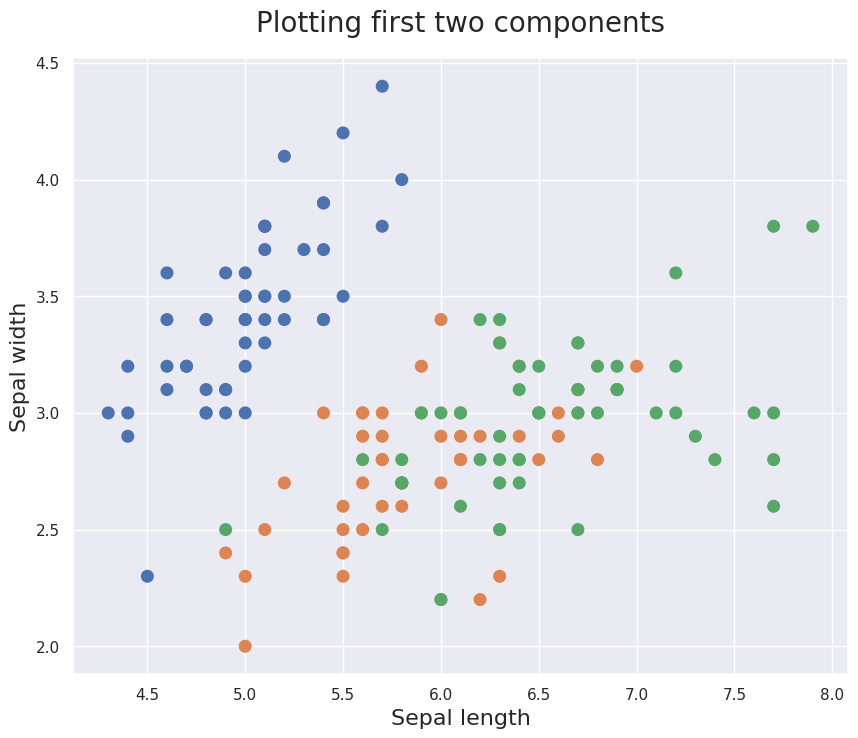

In [15]:
plot_iris_2d(
    x = iris['sepal_length'],
    y = iris['sepal_width'],
    title = 'Plotting first two components',
    xlabel = 'Sepal length',
    ylabel = 'Sepal width')

## 2D Plotting with PCA

In [16]:
pca = PCA(n_components=2)
points = pca.fit_transform(iris[features])

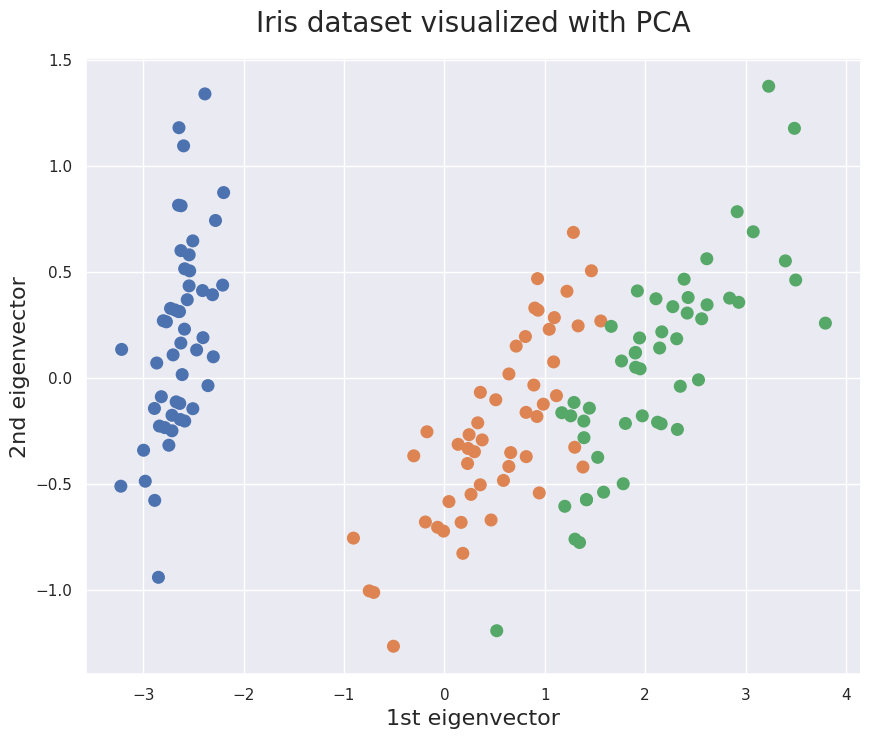

In [17]:
plot_iris_2d(
    x = points[:,0],
    y = points[:,1],
    title = 'Iris dataset visualized with PCA')

##Question 1
Objective: Apply PCA to the Breast Cancer Wisconsin dataset and analyze the variance explained by each principal component.

Steps:

1. Load the Breast Cancer Wisconsin dataset from sklearn.datasets.

2. Standardize the dataset: Ensure each feature has a mean of zero and a standard deviation of one.

3. Apply PCA to reduce the dataset to two dimensions.

4. Plot the cumulative explained variance to determine how many components are needed to explain a significant portion of the variance.

5. Plot a scree plot showing the explained variance of the first 10 principal components.

6. Identify the elbow point and print the number of components to retain.

5. Visualize the first two principal components in a scatter plot, coloring the points based on their target labels.

## 3D plotting with PCA

In [18]:
pca = PCA(n_components=3)
points = pca.fit_transform(iris[features])

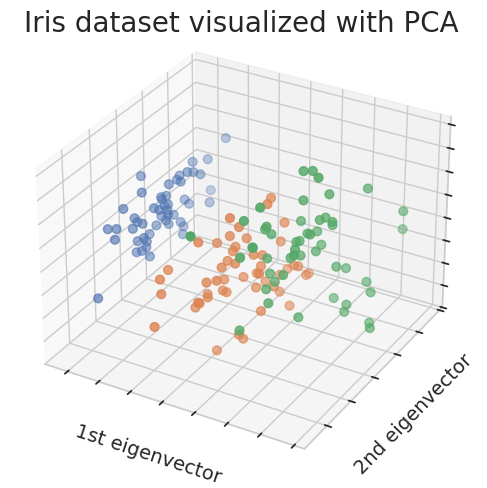

In [19]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with PCA")

## Kernel PCA

Kernel PCA extends the capabilities of standard PCA to capture nonlinear structures in the data by applying the "kernel trick." This technique allows PCA to operate in a higher-dimensional feature space without explicitly computing the transformation, making it effective for datasets where linear PCA fails to capture the underlying patterns

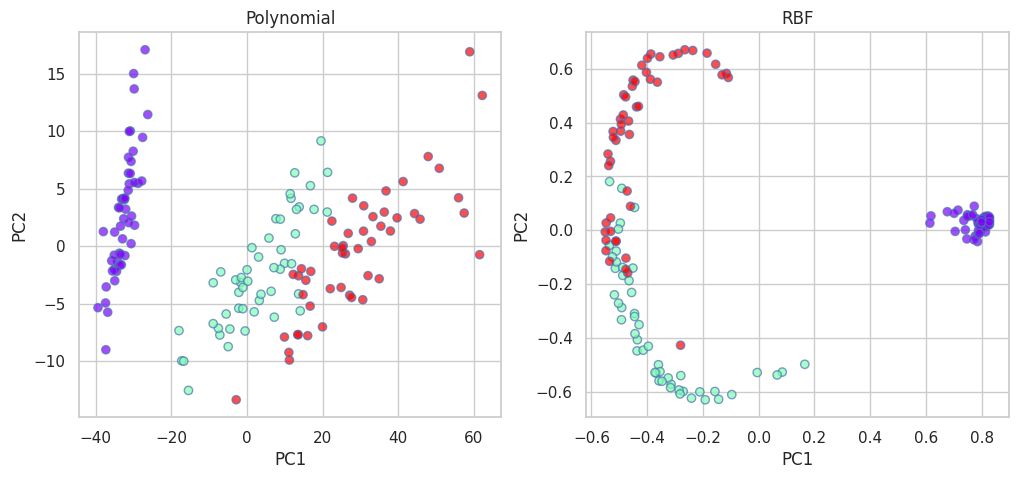

In [20]:
# Polynomial Kernel
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5)
X_kpca_poly = kpca_poly.fit_transform(X)

# RBF Kernel
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
X_kpca_rbf = kpca_rbf.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[0].set_title("Polynomial")
ax[0].scatter(
    X_kpca_poly[:,0],
    X_kpca_poly[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].set_title("RBF")
ax[1].scatter(
    X_kpca_rbf[:,0],
    X_kpca_rbf[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

##Question 2
Objective: Apply Kernel PCA to the "moons" dataset and evaluate its effectiveness in separating the classes.


Steps:

1. Generate the "moons" dataset using sklearn.datasets.make_moons with added noise.

2. Visualize the original dataset to observe the overlap between classes.

3. Apply Kernel PCA with different kernels (e.g., 'rbf', 'poly') to reduce the dataset to two dimensions.

4. Visualize the transformed data for each kernel, coloring the points based on their class labels.

5. Compare the results: Discuss which kernel provided the best separation and why.


Hint: Experiment with different values of the gamma parameter for the RBF kernel and the degree parameter for the polynomial kernel to observe their effects.

## Linear Discriminant Analysis

Unlike PCA or kernel PCA, LDA uses labelled data, i.e it is a supervised algorithm. Let's first use the sklearn's built-in LDA module.

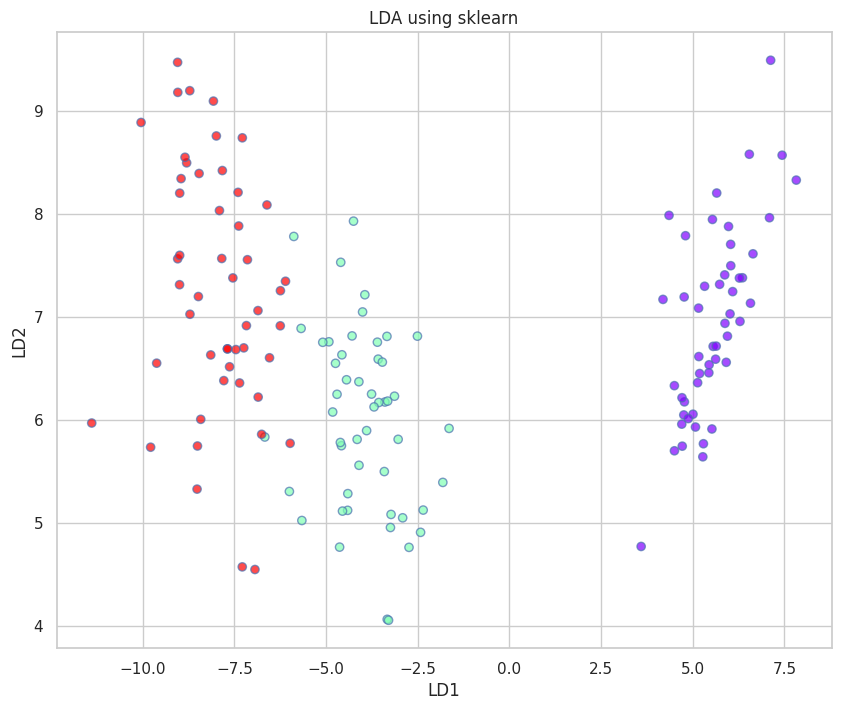

In [21]:
lda = LinearDiscriminantAnalysis(n_components=2, solver='eigen')
X_lda = lda.fit_transform(X, Y)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA using sklearn')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=Y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

## Question 3
Objective: Apply LDA to the Wine dataset and evaluate its effectiveness in classifying different wine types.

Steps:

1. Load the Wine dataset from sklearn.datasets.
2. Standardize the dataset: Ensure each feature has zero mean and unit variance.
3. Apply LDA to reduce the dataset to two dimensions.
4. Visualize the results: Create a scatter plot of the two LDA components, coloring the points based on their class labels.
5. Evaluate classification performance: Use a classification algorithm (e.g., logistic regression) on the LDA-transformed data and assess its accuracy.

Hint: Standardizing the data is crucial for LDA to perform optimally.

## 2D plotting with t-SNE

t-SNE is a nonlinear dimensionality reduction technique primarily used for data visualization. It models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points.

In [22]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


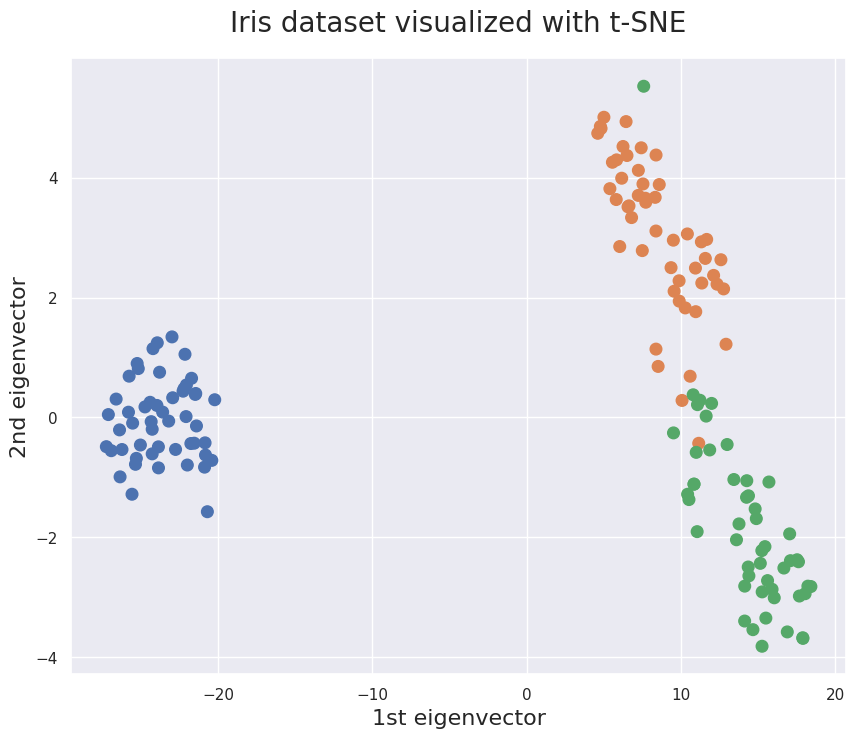

In [23]:
plot_iris_2d(
    x = points[:, 0],
    y = points[:, 1],
    title = 'Iris dataset visualized with t-SNE')

## 3D plotting with t-SNE

In [24]:
tsne = TSNE(n_components=3, n_iter=5000, random_state=RANDOM_STATE)
points = tsne.fit_transform(iris[features])

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


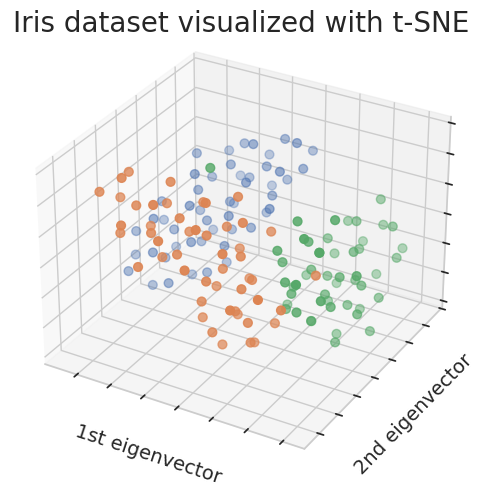

In [25]:
plot_iris_3d(
    x = points[:,0],
    y = points[:,1],
    z = points[:,2],
    title = "Iris dataset visualized with t-SNE")

##Question 4
Objective: Apply t-SNE to the Digits dataset and explore the clustering of handwritten digits.

Steps:

1. Load the Digits dataset from sklearn.datasets. This dataset contains images of handwritten digits (0-9) with 64 features each.

2. Standardize the dataset: Normalize the feature values for optimal performance.

3. Apply t-SNE to reduce the dataset to two dimensions.

4. Visualize the results in a scatter plot, coloring the points based on their digit labels.

5. Analyze the plot: Observe how well t-SNE separates the different digit clusters.

Hint: Consider experimenting with different perplexity values in t-SNE to see how it affects the visualization.



##Question 5:

a.  What is the main difference between PCA and t-SNE?

b.  What are the advantages and disadvantages of using PCA?

c.  What are the advantages and disadvantages of using t-SNE?

d.  When should you use PCA versus t-SNE?

e.  What are some common applications of PCA and t-SNE?

##Question 6: Hyperparameter Tuning in t-SNE
Objective: Understand the impact of t-SNE hyperparameters—perplexity, learning_rate, and n_iter—on the resulting visualization.

Steps:

1. Load a dataset of your choice: For instance, the Wine dataset from sklearn.datasets.

2. Standardize the dataset: Ensure each feature has zero mean and unit variance.

3. Apply t-SNE with default parameters:

4. Reduce the dataset to 2 dimensions.

5. Visualize the results using a scatter plot, coloring the points based on their class labels.

6. Experiment with different perplexity values:
Test values like 5, 30, and 50. Observe and document how the cluster formations change.

7. Experiment with different learning_rate values:
Test values like 10, 200, and 1000.
Analyze the stability and spread of the clusters.

8. Experiment with different n_iter values:
Test values like 250, 500, and 1000. Determine how many iterations are necessary for convergence.

Summarize findings:
- Discuss how each hyperparameter affects the visualization.
- Provide recommendations for choosing appropriate hyperparameter values based on dataset characteristics.


## Question 7: KL Divergence vs. Perplexity
1. Load a high-dimensional dataset of your choice (e.g., Breast Cancer, Customer Churn, or any custom dataset).

2. Preprocess the data: Normalize or standardize it as required.

3. Loop through different perplexity values from 5 to 55 with a step size of 5.

4. For each perplexity, fit a TSNE model with n_components=2 and record the KL divergence.

5. Plot the Perplexity vs. KL Divergence using Plotly Express line plot.

Now answer:
- At what perplexity does the KL Divergence begin to flatten?

- Why is this flattening important in choosing the optimal perplexity?

##Question 8: Apply t-SNE with Optimal Perplexity
Instructions:

1. Based on the plot above, choose the optimal perplexity (e.g., 40).

2. Fit the TSNE model again using this value and transform your data.

3. Use plotly.express.scatter to create a 2D scatter plot of the reduced components, colored by class labels.

Now answer:
- How well-separated are the clusters in your t-SNE plot?

- What might the sub-clusters within the same class label indicate?

- Could this help you in customer segmentation or anomaly detection?